In [1]:
# Import dependencies 
import matplotlib.pyplot as plt
import csv
import requests
import pandas as pd
from pprint import pprint
import json
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

In [2]:
# Import merged file
csvfile = "merged_stock_prices.txt"
csvreader = pd.read_csv(csvfile)
csvreader.head()

,Dates,Crude Oil stock price,Ford stock price,Honda stock price,Toyota stock price,GM stock price
0,2018-10-31,64.86,9.55,28.50,117.05,36.59
1,2018-10-30,66.35,9.46,27.81,116.24,33.54
2,2018-10-29,66.69,9.28,26.70,115.31,33.13
3,2018-10-26,67.62,8.98,26.75,117.30,32.65
4,2018-10-25,66.97,8.99,26.63,116.66,32.00


In [3]:
# Reduce the timeframe accross time series
start_date = '2016-11-01'
end_date = '2018-10-31'
mask = (csvreader['Dates'] > start_date) & (csvreader['Dates'] <= end_date)

csvreader.loc[mask]

df = csvreader.loc[mask]

df.count()

Dates                    503
Crude Oil stock price    503
Ford stock price         503
Honda stock price        503
Toyota stock price       503
GM stock price           503
dtype: int64

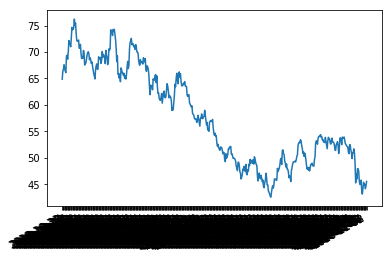

In [4]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['Crude Oil stock price'])
fig.autofmt_xdate()
plt.show()

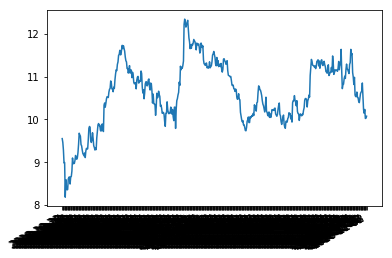

In [5]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['Ford stock price'])
fig.autofmt_xdate()
plt.show()

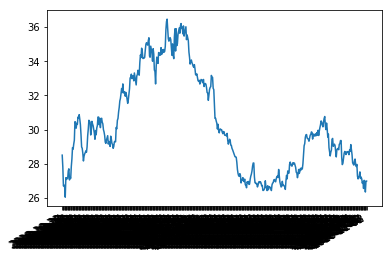

In [6]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['Honda stock price'])
fig.autofmt_xdate()
plt.show()

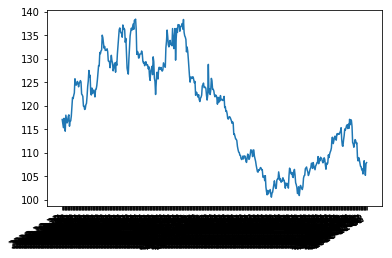

In [49]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['Toyota stock price'])
fig.autofmt_xdate()
plt.show()

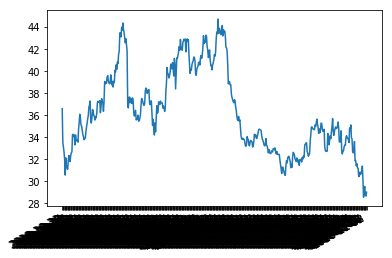

In [46]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['GM stock price'])
fig.autofmt_xdate()
plt.show()

In [47]:
# Sort dataframe
freedom_df = df.sort_values("Dates")
freedom_df.head()

,Dates,Crude Oil stock price,Ford stock price,Honda stock price,Toyota stock price,GM stock price
502,2016-11-02,45.51,10.0735,26.9783,107.8723,29.0060
501,2016-11-03,44.66,10.0294,26.9879,107.6725,28.6555
500,2016-11-04,44.13,10.0205,26.3414,105.1893,28.7385
499,2016-11-07,44.95,10.2326,26.9118,107.0160,29.5317
498,2016-11-08,44.83,10.1442,27.0259,108.2814,29.2642


In [48]:
# Calculate the percentage return
price = freedom_df['Crude Oil stock price']
crude_return = price.pct_change(1)
crude_return.head()

502         NaN
501   -0.018677
500   -0.011867
499    0.018581
498   -0.002670
Name: Crude Oil stock price, dtype: float64

In [11]:
# Calculate the percentage return
price2 = freedom_df['Ford stock price']
ford_return = price2.pct_change(1)
ford_return.head()

502         NaN
501   -0.004378
500   -0.000887
499    0.021167
498   -0.008639
Name: Ford stock price, dtype: float64

In [12]:
# Calculate the percentage return
price3 = freedom_df['Honda stock price']
honda_return = price3.pct_change(1)
honda_return.head()

502         NaN
501    0.000356
500   -0.023955
499    0.021654
498    0.004240
Name: Honda stock price, dtype: float64

In [13]:
# Calculate the percentage return
price4 = freedom_df['Toyota stock price']
toyota_return = price4.pct_change(1)
toyota_return.head()

502         NaN
501   -0.001852
500   -0.023063
499    0.017366
498    0.011824
Name: Toyota stock price, dtype: float64

In [14]:
# Calculate the percentage return
price5 = freedom_df['GM stock price']
gm_return = price5.pct_change(1)
gm_return.head()

502         NaN
501   -0.012084
500    0.002896
499    0.027601
498   -0.009058
Name: GM stock price, dtype: float64

In [15]:
# Assign returns into a Dataframe
freedom_df['Crude Return']=crude_return
freedom_df['Ford Return']=ford_return
freedom_df['Honda Return']=honda_return
freedom_df['Toyota Return']=toyota_return
freedom_df['GM Return']=gm_return
freedom_df.head()

,Dates,Crude Oil stock price,Ford stock price,Honda stock price,Toyota stock price,GM stock price,Crude Return,Ford Return,Honda Return,Toyota Return,GM Return
502,2016-11-02,45.51,10.0735,26.9783,107.8723,29.0060,NaN,NaN,NaN,NaN,NaN
501,2016-11-03,44.66,10.0294,26.9879,107.6725,28.6555,-0.018677,-0.004378,0.000356,-0.001852,-0.012084
500,2016-11-04,44.13,10.0205,26.3414,105.1893,28.7385,-0.011867,-0.000887,-0.023955,-0.023063,0.002896
499,2016-11-07,44.95,10.2326,26.9118,107.0160,29.5317,0.018581,0.021167,0.021654,0.017366,0.027601
498,2016-11-08,44.83,10.1442,27.0259,108.2814,29.2642,-0.002670,-0.008639,0.004240,0.011824,-0.009058


In [16]:
# Clean data
freedom_df.dropna(inplace=True)
freedom_df.columns

Index(['Dates', 'Crude Oil stock price', 'Ford stock price',
       'Honda stock price', 'Toyota stock price', 'GM stock price',
       'Crude Return', 'Ford Return', 'Honda Return', 'Toyota Return',
       'GM Return'],
      dtype='object')

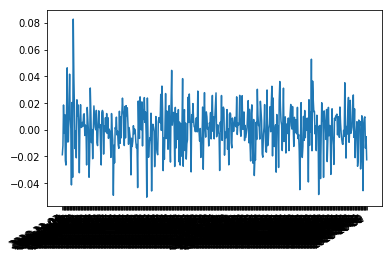

In [17]:
# Plot returns crude oil/quick overview/no title & no axis
fig, ax1 = plt.subplots()
ax1.plot(freedom_df['Dates'], freedom_df['Crude Return'])
fig.autofmt_xdate()
plt.show()

(array([  0.,   8.,  48., 167., 231.,  43.,   4.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

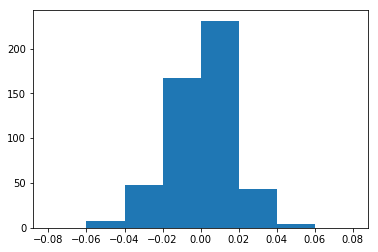

In [18]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Crude Return'], bins=auto, label="WTI")

(array([  1.,   5.,  21., 212., 235.,  25.,   2.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

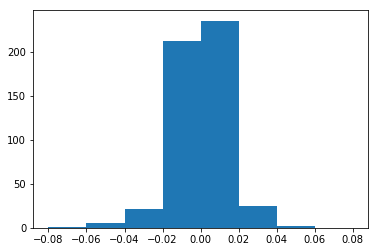

In [19]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Ford Return'], bins=auto, label="WTI")

(array([  0.,   1.,  15., 217., 250.,  18.,   1.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

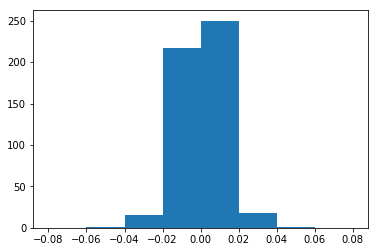

In [20]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Honda Return'], bins=auto, label="WTI")

(array([  0.,   1.,  11., 229., 243.,  15.,   3.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

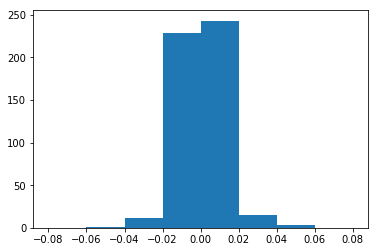

In [21]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Toyota Return'], bins=auto, label="WTI")

(array([  0.,   4.,  40., 185., 230.,  33.,   8.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

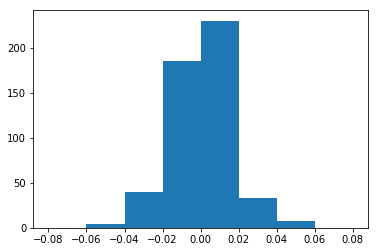

In [22]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['GM Return'], bins=auto, label="WTI")

In [23]:
# Generate two populations
population1 = freedom_df["Crude Oil stock price"]

populationFord = freedom_df['Ford stock price']
stats.ttest_ind(population1, populationFord, equal_var = False)

Ttest_indResult(statistic=115.67034171523453, pvalue=0.0)

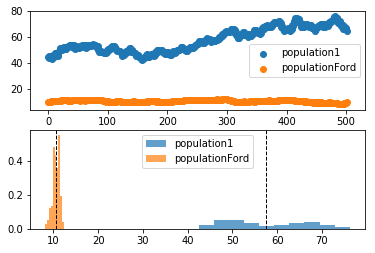

In [24]:
# Generate some data and show the scatter plot
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
plt.hist(populationFord, 10, density=True, alpha=0.7, label="populationFord")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(populationFord.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.subplot(2, 1, 1)
plt.scatter(range(len(population1)), population1, label="population1")
plt.scatter(range(len(populationFord)), populationFord, label="populationFord")
plt.legend()

In [25]:
# Generate two populations
population1 = freedom_df["Crude Oil stock price"]

populationHonda = freedom_df['Honda stock price']
stats.ttest_ind(population1, populationHonda, equal_var = False)

Ttest_indResult(statistic=64.61416237353802, pvalue=1.7105408228920077e-271)

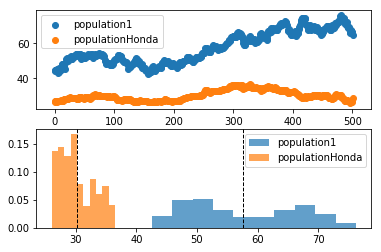

In [26]:
# Generate some data and show the scatter plot
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
plt.hist(populationHonda, 10, density=True, alpha=0.7, label="populationHonda")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(populationHonda.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.subplot(2, 1, 1)
plt.scatter(range(len(population1)), population1, label="population1")
plt.scatter(range(len(populationHonda)), populationHonda, label="populationHonda")
plt.legend()

In [27]:
# Generate two populations
population1 = freedom_df["Crude Oil stock price"]

populationToyota = freedom_df['Toyota stock price']
stats.ttest_ind(population1, populationToyota, equal_var = False)

Ttest_indResult(statistic=-96.79729938737542, pvalue=0.0)

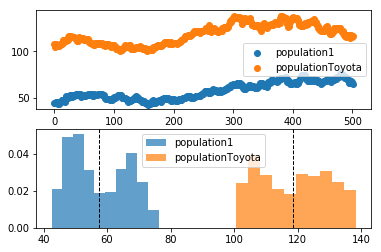

In [28]:
# Generate some data and show the scatter plot
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
plt.hist(populationToyota, 10, density=True, alpha=0.7, label="populationToyota")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(populationToyota.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.subplot(2, 1, 1)
plt.scatter(range(len(population1)), population1, label="population1")
plt.scatter(range(len(populationToyota)), populationToyota, label="populationToyota")
plt.legend()

In [29]:
# Generate two populations
population1 = freedom_df["Crude Oil stock price"]

populationGM = freedom_df['GM stock price']
stats.ttest_ind(population1, populationGM, equal_var = False)

Ttest_indResult(statistic=48.686696640670895, pvalue=7.102619843743391e-222)

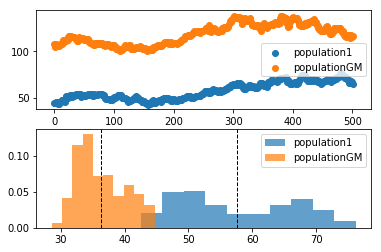

In [30]:
# Generate some data and show the scatter plot
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
plt.hist(populationGM, 10, density=True, alpha=0.7, label="populationGM")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(populationGM.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.subplot(2, 1, 1)
plt.scatter(range(len(population1)), population1, label="population1")
plt.scatter(range(len(populationGM)), populationToyota, label="populationGM")
plt.legend()

In [33]:
# Test to create a scatter plot 
x_axis = freedom_df['Crude Return']
fake = freedom_df['Ford Return']
(slope, intercept, _, _, _) = linregress(x_axis, fake)
fit = slope * x_axis + intercept


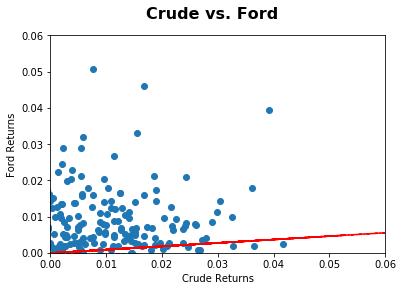

In [34]:
# Plot scatter graph
fig, ax = plt.subplots()

fig.suptitle("Crude vs. Ford", fontsize=16, fontweight="bold")

ax.set_xlim(0, .06)
ax.set_ylim(0, .06)

ax.set_xlabel("Crude Returns")
ax.set_ylabel("Ford Returns")

ax.plot(x_axis, fake, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r--')

plt.show()

In [35]:
freedom_df.columns

Index(['Dates', 'Crude Oil stock price', 'Ford stock price',
       'Honda stock price', 'Toyota stock price', 'GM stock price',
       'Crude Return', 'Ford Return', 'Honda Return', 'Toyota Return',
       'GM Return'],
      dtype='object')

In [36]:
# Generate two populations
populationReturn1 = freedom_df["Crude Return"]

populationReturnFord = freedom_df['Ford Return']
stats.ttest_ind(population1, populationFord, equal_var = False)

Ttest_indResult(statistic=115.67034171523453, pvalue=0.0)

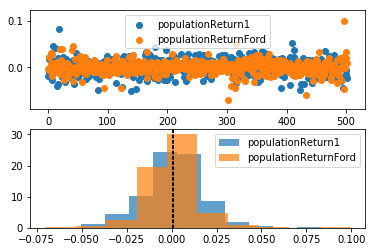

In [52]:
# Generate some data and show the scatter plot
plt.subplot(2, 1, 2)
plt.hist(populationReturn1, 10, density=True, alpha=0.7, label="populationReturn1")
plt.hist(populationReturnFord, 10, density=True, alpha=0.7, label="populationReturnFord")
plt.axvline(populationReturn1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(populationReturnFord.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.subplot(2, 1, 1)
plt.scatter(range(len(populationReturn1)), populationReturn1, label="populationReturn1")
plt.scatter(range(len(populationReturnFord)), populationReturnFord, label="populationReturnFord")
plt.legend()
plt.savefig("FORD_TTEST.png")

In [ ]:
# Generate two populations
populationReturn1 = freedom_df["Crude Return"]

populationReturnHonda = freedom_df['Honda Return']
stats.ttest_ind(population1, populationHonda, equal_var = False)

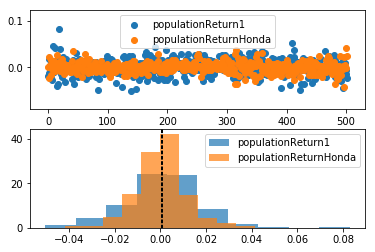

In [51]:
# Generate some data and show the scatter plot
plt.subplot(2, 1, 2)
plt.hist(populationReturn1, 10, density=True, alpha=0.7, label="populationReturn1")
plt.hist(populationReturnHonda, 10, density=True, alpha=0.7, label="populationReturnHonda")
plt.axvline(populationReturn1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(populationReturnHonda.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.subplot(2, 1, 1)
plt.scatter(range(len(populationReturn1)), populationReturn1, label="populationReturn1")
plt.scatter(range(len(populationReturnHonda)), populationReturnHonda, label="populationReturnHonda")
plt.legend()
plt.savefig("HONDA_TTEST.png")

In [40]:
# Generate two populations
populationReturn1 = freedom_df["Crude Return"]

populationReturnToyota = freedom_df['Toyota Return']
stats.ttest_ind(population1, populationToyota, equal_var = False)

Ttest_indResult(statistic=-96.79729938737542, pvalue=0.0)

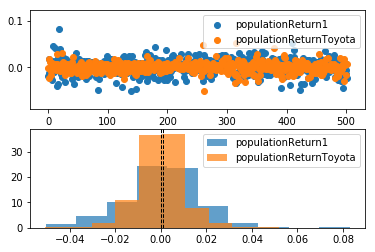

In [53]:
# Generate some data and show the scatter plot
plt.subplot(2, 1, 2)
plt.hist(populationReturn1, 10, density=True, alpha=0.7, label="populationReturn1")
plt.hist(populationReturnToyota, 10, density=True, alpha=0.7, label="populationReturnToyota")
plt.axvline(populationReturn1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(populationReturnToyota.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.subplot(2, 1, 1)
plt.scatter(range(len(populationReturn1)), populationReturn1, label="populationReturn1")
plt.scatter(range(len(populationReturnToyota)), populationReturnToyota, label="populationReturnToyota")
plt.legend()
plt.savefig("TOYOTA_TTEST.png")

In [ ]:
# Generate two populations
populationReturn1 = freedom_df["Crude Return"]

populationReturnGM = freedom_df['GM Return']
stats.ttest_ind(population1, populationGM, equal_var = False)

In [ ]:
# Generate some data and show the scatter plot
plt.subplot(2, 1, 2)
plt.hist(populationReturn1, 10, density=True, alpha=0.7, label="populationReturn1")
plt.hist(populationReturnGM, 10, density=True, alpha=0.7, label="populationReturnGM")
plt.axvline(populationReturn1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(populationReturnGM.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.subplot(2, 1, 1)
plt.scatter(range(len(populationReturn1)), populationReturn1, label="populationReturn1")
plt.scatter(range(len(populationReturnGM)), populationReturnGM, label="populationReturnGM")
plt.legend()
plt.savefig("GM_TTEST.png")